In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Read the data and understanding data

In [3]:
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

Columns like season , mnth looks like categorical with value of integers 

In [5]:
# Check the column information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### One column dteday is object, rest are numerical in nature

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data checks and Visualisation of data
  ### Preliminary observation of data and understanding the data for analaysis

missing value check need not be done as `bike.info()` has mentioned all are non null values

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [16]:
bike['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [17]:
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [18]:
bike['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [19]:
bike['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [10]:
bike_sanitized = bike.drop(columns=['instant', 'dteday', 'casual', 'registered'])

In [ ]:
bike_sanitized.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
bike_sanitized.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
categorical_columns = ['season', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
numerical_columns = ['yr', 'cnt','hum','temp', 'atemp', 'windspeed']

In [ ]:
bike_sanitized[numerical_columns].describe()

,yr,cnt,hum,temp,atemp,windspeed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,4508.006849,62.765175,20.319259,23.726322,12.763620
std,0.500343,1936.011647,14.237589,7.506729,8.150308,5.195841
min,0.000000,22.000000,0.000000,2.424346,3.953480,1.500244
25%,0.000000,3169.750000,52.000000,13.811885,16.889713,9.041650
50%,0.500000,4548.500000,62.625000,20.465826,24.368225,12.125325
75%,1.000000,5966.000000,72.989575,26.880615,30.445775,15.625589
max,1.000000,8714.000000,97.250000,35.328347,42.044800,34.000021


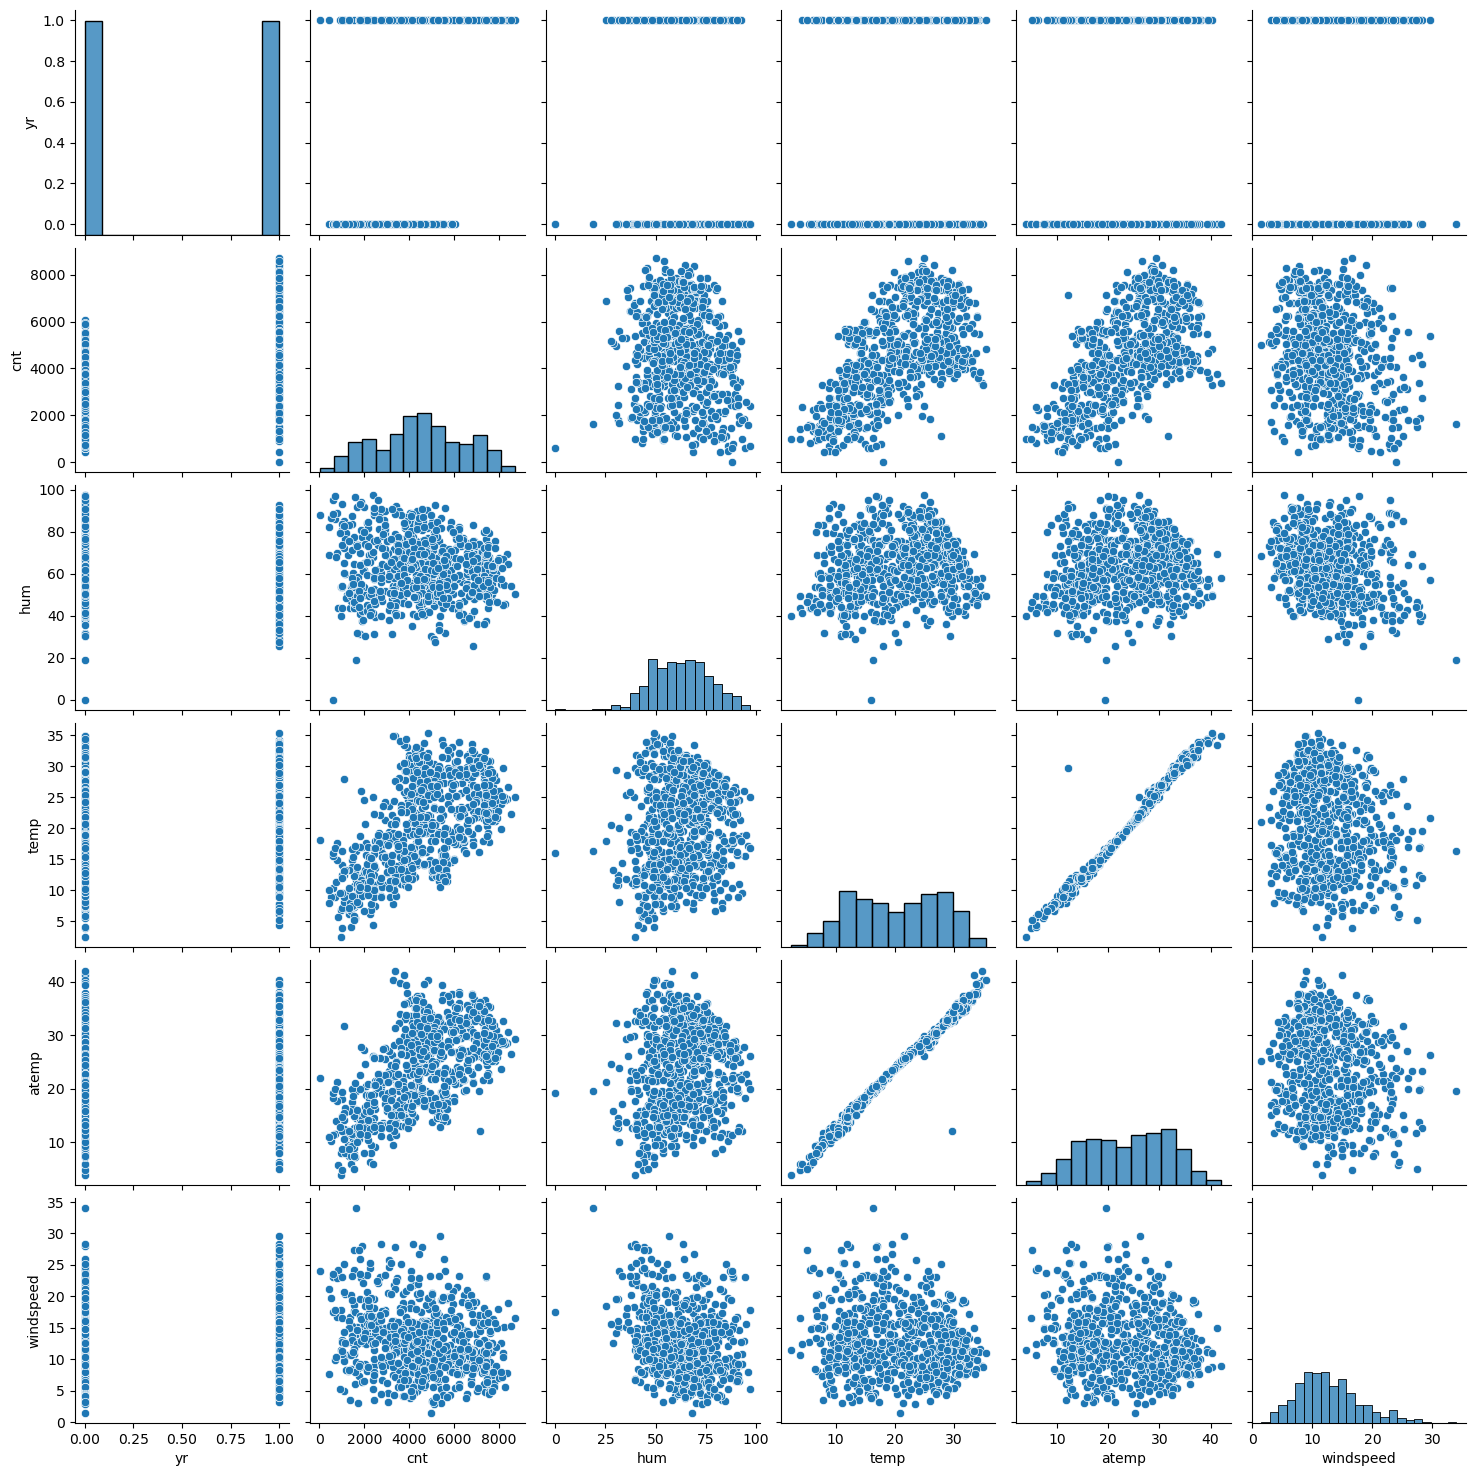

In [12]:
sns.pairplot(bike_sanitized[numerical_columns])
plt.show()

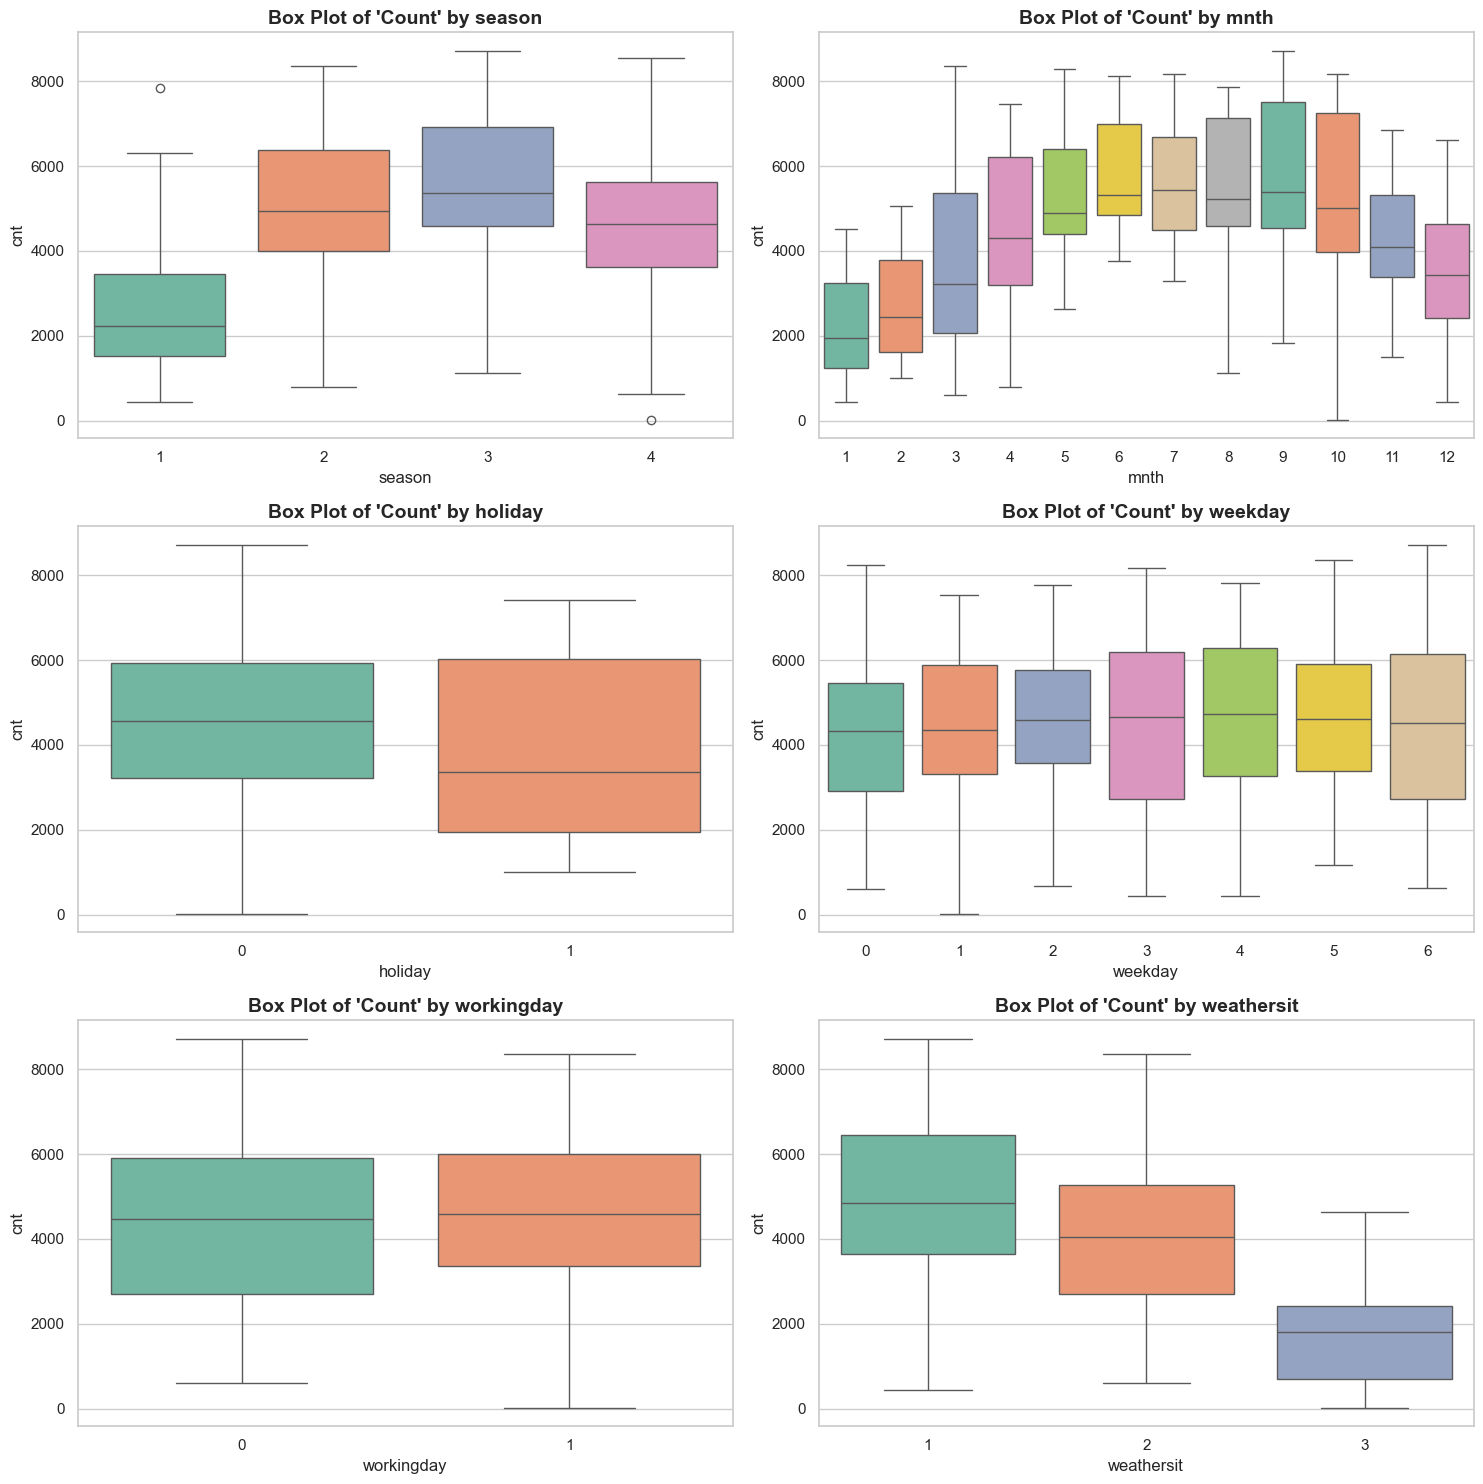

In [13]:
sns.set_theme(style="whitegrid")
num_plots = len(categorical_columns)
cols_per_row = 2
rows = math.ceil(num_plots / cols_per_row)

# size based on no of rows
plt.figure(figsize=(15, rows * 5)) 

for index, col in enumerate(categorical_columns):
    plt.subplot(rows, cols_per_row, index + 1)
    sns.boxplot(x=col, y="cnt", data=bike_sanitized, palette="Set2")
    plt.title(f"Box Plot of 'Count' by {col}", fontsize=14, weight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("cnt", fontsize=12)

plt.tight_layout()
plt.show()




### Step 3: Preparation of data

Numbers representation for categorical column is complex adding some labels to understand the data better

In [14]:
bike_labeled = bike_sanitized.copy()

# Mapping for 'season'
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
bike_labeled["season"] = bike_labeled["season"].map(season_mapping)

# Mapping for 'mnth'
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
bike_labeled["mnth"] = bike_labeled["mnth"].map(month_mapping)

# Mapping for 'weekday'
weekday_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}
bike_labeled["weekday"] = bike_labeled["weekday"].map(weekday_mapping)

# Mapping for 'holiday'
holiday_mapping = {
    0: "Non-Holiday",
    1: "Holiday"
}
bike_labeled["holiday"] = bike_labeled["holiday"].map(holiday_mapping)

# Mapping for 'workingday'
workingday_mapping = {
    0: "Non-Workingday",
    1: "Workingday"
}
bike_labeled["workingday"] = bike_labeled["workingday"].map(workingday_mapping)

# Mapping for 'weathersit'
weathersit_mapping = {
    1: "Clear",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
bike_labeled["weathersit"] = bike_labeled["weathersit"].map(weathersit_mapping)

# Display the transformed dataset
bike_labeled.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,Non-Holiday,Sunday,Non-Workingday,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Non-Holiday,Monday,Non-Workingday,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Non-Holiday,Tuesday,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Non-Holiday,Wednesday,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Non-Holiday,Thursday,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


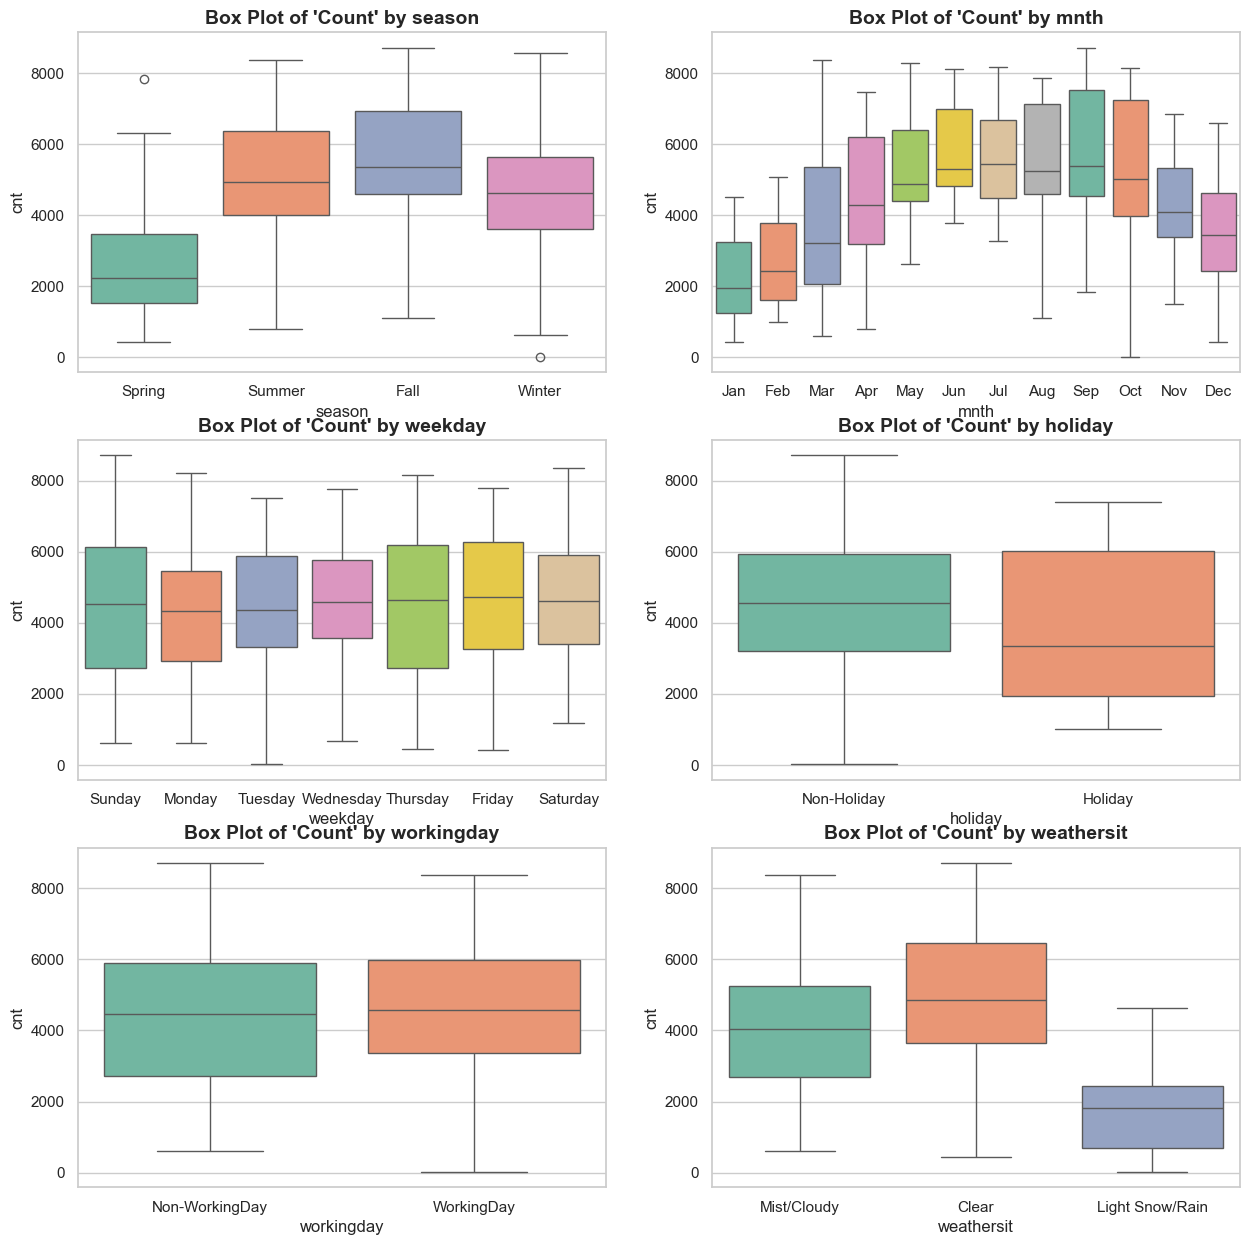

In [61]:
sns.set_theme(style="whitegrid")
num_plots = len(categorical_columns)
cols_per_row = 2
rows = math.ceil(num_plots / cols_per_row)

# size based on no of rows
plt.figure(figsize=(15, rows * 5)) 

for index, col in enumerate(categorical_columns):
    plt.subplot(rows, cols_per_row, index + 1)
    sns.boxplot(x=col, y="cnt", data=bike_labeled, palette="Set2")
    plt.title(f"Box Plot of 'Count' by {col}", fontsize=14, weight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("cnt", fontsize=12)


plt.show()

In [15]:
bike_labeled = bike_sanitized.copy()
# dummies need to be created for categorical data
mappings = {
    "season": {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"},
    "holiday": {0: "Non-Holiday", 1: "Holiday"},
    "workingday": {0: "Non-WorkingDay", 1: "WorkingDay"},
    "weathersit": {
        1: "Clear",
        2: "Mist/Cloudy",
        3: "Light Snow/Rain",
        4: "Heavy Rain/Snow"
    }
}

# Apply mappings to categorical columns dynamically
for col, mapping in mappings.items():
    bike_labeled[col] = bike_labeled[col].map(mapping)

# Map months and weekdays dynamically using calendar
bike_labeled["mnth"] = bike_labeled["mnth"].map(lambda x: calendar.month_abbr[x])  # Short month names
bike_labeled["weekday"] = bike_labeled["weekday"].map(lambda x: calendar.day_name[x])  # Full weekday names

# Create dummy variables for all specified categorical columns
bike_with_dummies = pd.get_dummies(bike_labeled, columns=["season", "mnth", "weekday", "holiday", "workingday", "weathersit"], drop_first=True)
# Remove prefixes from column names
bike_with_dummies.columns = [
    col.split("_", 1)[-1] if "_" in col else col 
    for col in bike_with_dummies.columns
]
# Display the resulting DataFrame
bike_with_dummies.head()
# Display the transformed dataset
bike_with_dummies.head()

,yr,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Non-Holiday,WorkingDay,Light Snow/Rain,Mist/Cloudy
0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,...,True,False,False,False,False,False,True,False,False,True
2,0,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,0,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,...,False,False,False,False,False,True,True,True,False,False
4,0,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,...,False,False,False,True,False,False,True,True,False,False


In [87]:
bike_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   temp             730 non-null    float64
 2   atemp            730 non-null    float64
 3   hum              730 non-null    float64
 4   windspeed        730 non-null    float64
 5   cnt              730 non-null    int64  
 6   Spring           730 non-null    bool   
 7   Summer           730 non-null    bool   
 8   Winter           730 non-null    bool   
 9   Aug              730 non-null    bool   
 10  Dec              730 non-null    bool   
 11  Feb              730 non-null    bool   
 12  Jan              730 non-null    bool   
 13  Jul              730 non-null    bool   
 14  Jun              730 non-null    bool   
 15  Mar              730 non-null    bool   
 16  May              730 non-null    bool   
 17  Nov             

In [16]:
# Identify boolean columns in the DataFrame
bool_columns = bike_with_dummies.select_dtypes(include=['bool']).columns

# Convert all boolean columns to integers (0 or 1)
bike_with_dummies[bool_columns] = bike_with_dummies[bool_columns].astype(int)

# Display the DataFrame to verify
bike_with_dummies.head()

,yr,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Aug,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Non-Holiday,WorkingDay,Light Snow/Rain,Mist/Cloudy
0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0


### Step 4: Split the data to test and training sets

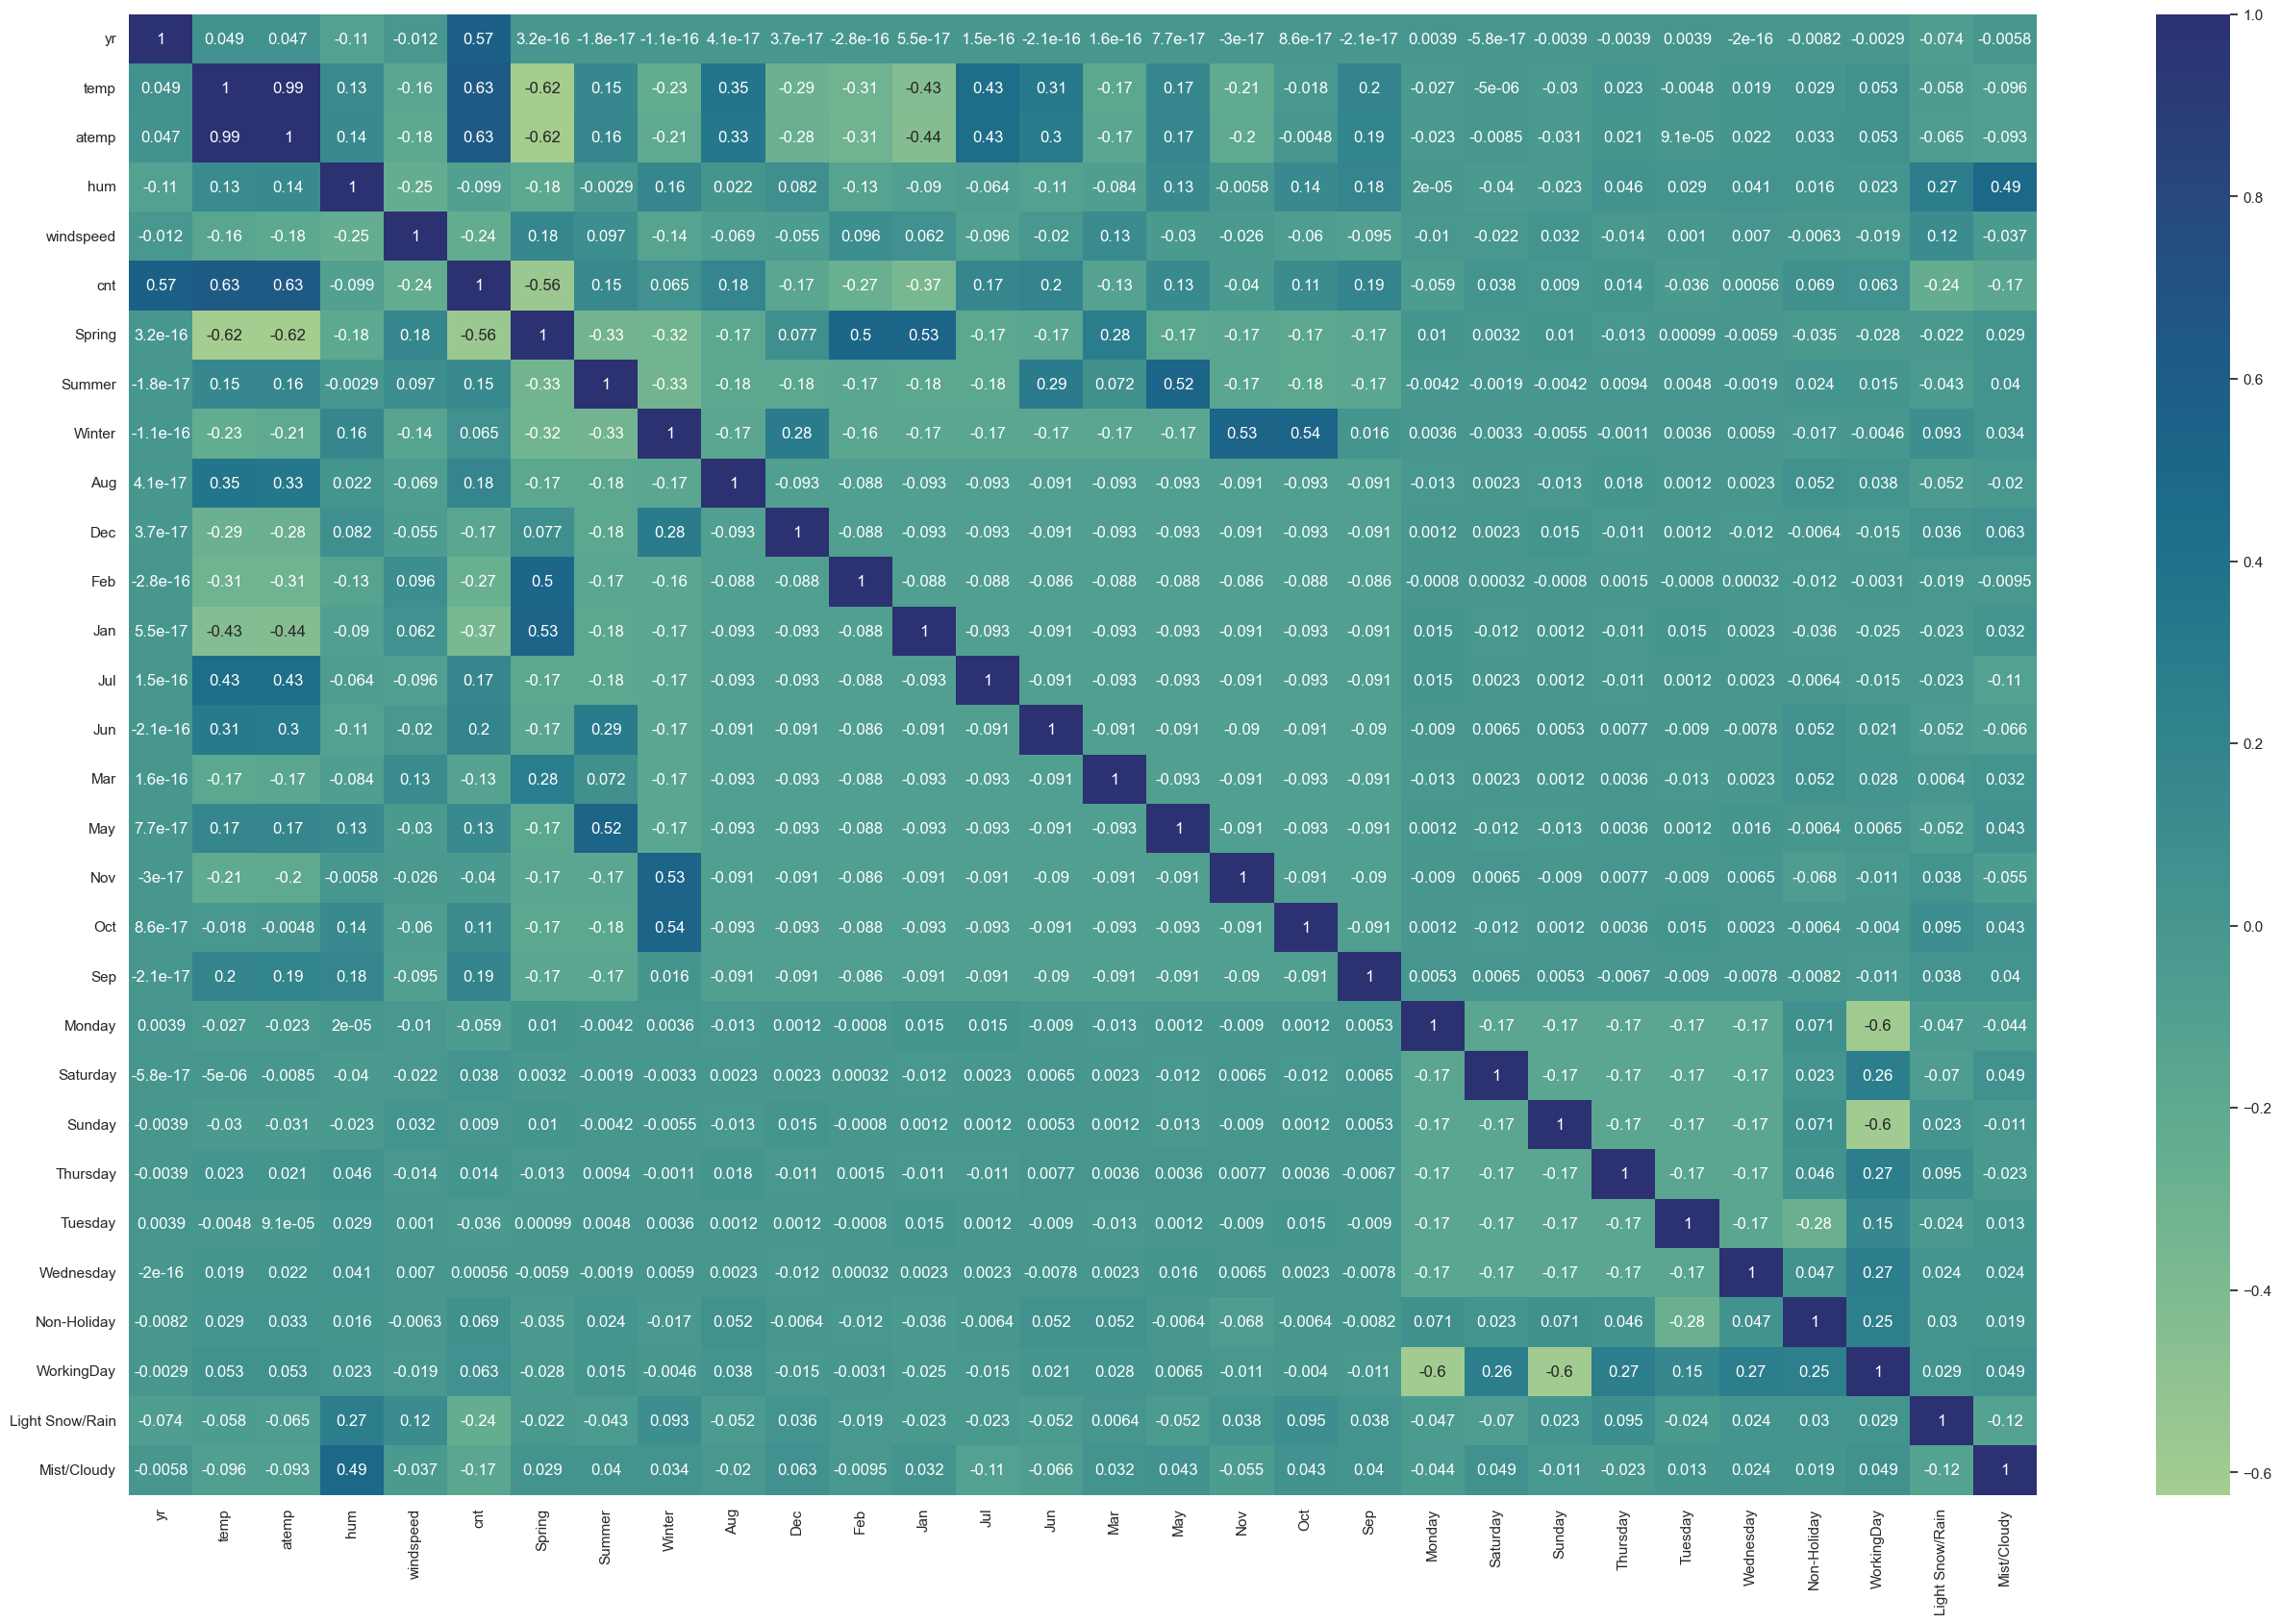

In [17]:
#heatmap
plt.figure(figsize=(32,20))
sns.heatmap(bike_with_dummies.corr(), annot=True, cmap='crest')
plt.show()

In [66]:
bike_with_dummies.columns

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Non-Holiday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy'],
      dtype='object')

In [18]:
# Assigning only the target variable to y
y = bike_with_dummies.pop('cnt')

# Assigning the remaining variables to X
X = bike_with_dummies

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)

(511, 29) (219, 29)


In [19]:
# Rescaling
scalar = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
# Fit the data
X_train[num_vars] = scalar.fit_transform(X_train[num_vars])
X_train.head()

,yr,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Non-Holiday,WorkingDay,Light Snow/Rain,Mist/Cloudy
683,1,0.327133,0.322150,0.639330,0.327101,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
645,1,0.403972,0.404998,0.731215,0.419004,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
163,0,0.717562,0.685963,0.509660,0.708724,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
360,0,0.331287,0.326273,0.785745,0.415925,1,0,0,0,1,...,0,0,0,0,0,1,1,1,0,1
640,1,0.745598,0.682653,0.817947,0.110593,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1


Most columns have relation with cnt, linear regression can be done


In [20]:

X_train.describe()

,yr,temp,atemp,hum,windspeed,Spring,Summer,Winter,Aug,Dec,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Non-Holiday,WorkingDay,Light Snow/Rain,Mist/Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,0.074364,...,0.152642,0.129159,0.150685,0.140900,0.148728,0.131115,0.972603,0.669276,0.029354,0.346380
std,0.500067,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,0.262619,...,0.359994,0.335704,0.358092,0.348259,0.356169,0.337857,0.163398,0.470935,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
# Use RFE to start with 15 features
rfe = RFE(estimator = lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [39]:
# Checking the ranking of each column assigned by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 7),
 ('Winter', False, 13),
 ('Aug', False, 5),
 ('Dec', False, 11),
 ('Feb', False, 3),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', False, 14),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 8),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 6),
 ('Non-Holiday', True, 1),
 ('WorkingDay', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist/Cloudy', True, 1)]

In [40]:
# Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [41]:
# Function to calculate VIFs and print them
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [43]:
# Checking the 15 columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'Non-Holiday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy'],
      dtype='object')

In [44]:
X_train_rfe = X_train[col]

Considering the variables one at time to be removed based on few parameters and trying to build the model. Lets starts with first iteration of below said variables in the array `cols`

In [45]:
# Model-1
cols =['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'Non-Holiday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.32e-187
Time:                        10:17:19   Log-Likelihood:                -4121.9
No. Observations:                 511   AIC:                             8276.
Df Residuals:                     495   BIC:                             8344.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2722.2385    341.460     

In [46]:
# temp has high p-value and high VIF not considering it
# Model-2
cols = ['yr', 'atemp', 'hum', 'windspeed', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'Non-Holiday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.77e-188
Time:                        10:17:26   Log-Likelihood:                -4122.0
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2715.3259    340.523     

In [47]:
# Non-Holiday has high p-value and high VIF; removing it.
# Model-3
cols = ['yr', 'atemp', 'hum', 'windspeed', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.30e-188
Time:                        10:17:34   Log-Likelihood:                -4123.4
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     497   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3030.3986    283.563     

In [ ]:
# hum has high VIF hence removing it.
# Model-4
cols = ['yr', 'atemp', 'windspeed', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.70e-186
Time:                        10:07:55   Log-Likelihood:                -4132.3
No. Observations:                 511   AIC:                             8291.
Df Residuals:                     498   BIC:                             8346.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2156.6944    195.254     

In [48]:
#atemp has VIF hence removing it.
# Model-5
cols = ['yr',  'windspeed', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.75e-152
Time:                        10:17:45   Log-Likelihood:                -4215.6
No. Observations:                 511   AIC:                             8455.
Df Residuals:                     499   BIC:                             8506.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4140.9770    156.135     

In [53]:
# atemp drop has affected the R-squared , its reduced, hence next VIF high value windspeed is removed.
# Model-6
cols = ['yr',  'atemp', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday', 'WorkingDay', 'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.22e-184
Time:                        10:34:33   Log-Likelihood:                -4138.4
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1821.6063    171.864     

In [ ]:
# Next high VIF is WorkingDay, removing it
# Model-7
cols = ['yr',  'temp', 'Spring', 'Jul', 'Mar',
       'Oct', 'Sep', 'Sunday',  'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          6.84e-181
Time:                        10:34:59   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     500   BIC:                             8369.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2175.1315    159.654     

In [88]:
# Sunday has P high value, removing it, also Mar is a month in spring removing it
# Model-8
cols = ['yr',  'temp', 'Spring', 'Jul', 
       'Oct', 'Sep',   'Light Snow/Rain',
       'Mist/Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.31e-180
Time:                        11:57:02   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8331.
Df Residuals:                     502   BIC:                             8369.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2190.5258    159.600     

Now we have arrived a point where model is
 1. R-Squared and Adjusted R-Squared values are at 82%
 2. P values are less than 0.5 
 3. VIF scores are less than 5

Model is good for testing now
 

## Residual Analysis

In [89]:
# Function to build a model and fit to the corresponding dataset
def build_model_sk(X,y):
    newlr = LinearRegression()
    newlr.fit(X,y)
    return newlr

In [90]:
# Building the model with columns from the final model i.e model #8
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2190.5258216852894 [ 2001.24168047  3398.84034075 -1421.53905368  -430.26864746
   745.65121712   592.32666649 -2341.46577884  -679.96645413]


In [91]:
y_train_pred = lr.predict(X_train[cols])

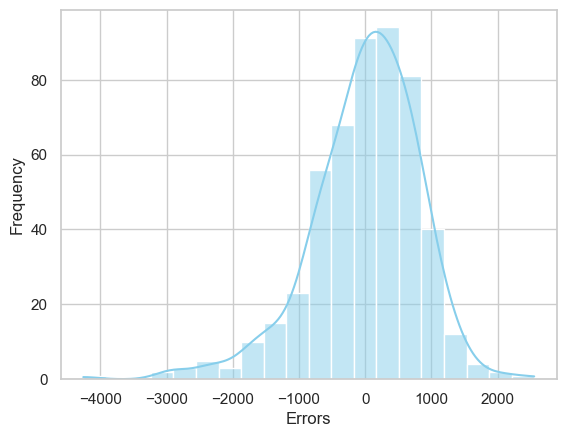

In [92]:
# Plot a histogram of the residuals
res = y_train - y_train_pred

sns.histplot(res,bins=20, kde=True, color="skyblue")
plt.xlabel("Errors")
plt.ylabel("Frequency")
plt.show()

1. Most residuals are concentrated around 0, indicating that the model predicts the values well for a majority of the data points.
2. The graph is roughly symmetric around 0, suggesting the residuals are distributed evenly between overpredictions and underpredictions.
3. The KDE curve approximates a bell-shaped distribution. This is desirable, as it aligns with the assumption of normality in residuals often made in linear regression models

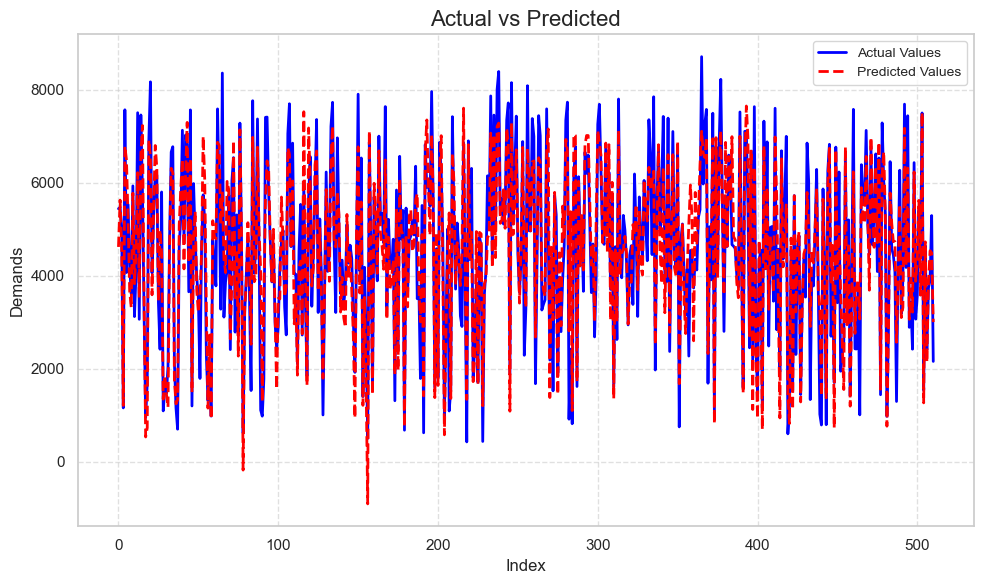

In [93]:
c = list(range(len(X_train)))

plt.figure(figsize=(10, 6))
plt.plot(c, y_train, color="blue", label="Actual Values", linewidth=2)
plt.plot(c, y_train_pred, color="red", label="Predicted Values", linestyle="--", linewidth=2)

plt.title('Actual vs Predicted', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Demands', fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


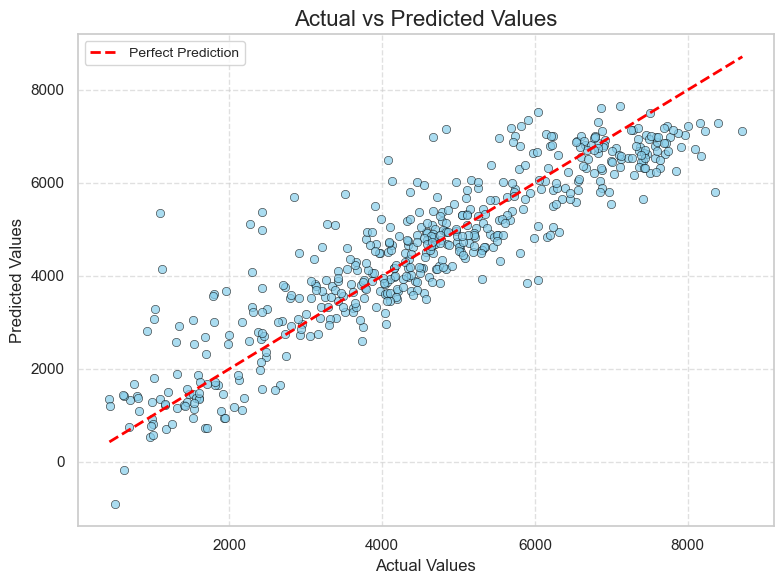

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred, color="skyblue", alpha=0.7, edgecolor="black")

#45-degree reference line
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linestyle="--", linewidth=2, label="Perfect Prediction")

plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(loc="best", fontsize=10) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The scatter plot indicates that the linear regression model is good in performance, with predictions aligning closely with actual values.

In [95]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185518476374996

In [96]:
cols

['yr', 'temp', 'Spring', 'Jul', 'Oct', 'Sep', 'Light Snow/Rain', 'Mist/Cloudy']

### Summary

1. Model # 8 is the final model, which can study impact on bike sharing. The following are the features to consider
    - yr
    - temp
    - Spring
    - Jul
    - Oct
    - Sep
    - Light Snow/Rain
    - Mist/Cloudy

#### Findings

| **Variable**         | **Coefficient (β)** | **Std. Err** | **t-value** | **P value** | **95% Confidence Interval**     | **Findings**                                                                 |
|-----------------------|---------------------|--------------|-------------|--------|----------------------------------|------------------------------------------------------------------------------|
| **const**            | 2190.53            | 159.60       | 13.73       | 0.000  | [1876.96, 2504.09]              | Baseline value when all predictors are zero. Its intercept                  |
| **yr**               | 2001.24            | 74.03        | 27.03       | 0.000  | [1855.80, 2146.69]              | Significant positive trend over time.                                       |
| **temp**             | 3398.84            | 241.29       | 14.09       | 0.000  | [2924.78, 3872.90]              | Strong positive effect of temperature on the dependent variable. If climate is warm increase bike demand |
| **Spring**           | -1421.54           | 117.99       | -12.05      | 0.000  | [-1653.35, -1189.73]            | Significant reduction in the dependent variable during the spring season. Low demand for bike  |
| **Jul**              | -430.27            | 147.90       | -2.91       | 0.004  | [-720.84, -139.70]              | Moderate negative impact in July. Bike demand is reduced in July            |
| **Oct**              | 745.65             | 134.27       | 5.55        | 0.000  | [481.86, 1009.45]               | Significant positive impact in October. Bike demand increase in October     |
| **Sep**              | 592.33             | 136.34       | 4.35        | 0.000  | [324.47, 860.18]                | Significant positive impact in September. Bike demand increase in September |
| **Light Snow/Rain**  | -2341.47           | 222.47       | -10.53      | 0.000  | [-2778.56, -1904.37]            | Largest negative impact due to light snow/rain conditions. Bike demand decreases during snow and rainy conditions |
| **Mist/Cloudy**      | -679.97            | 78.65        | -8.65       | 0.000  | [-834.48, -525.45]              | Significant negative impact during misty or cloudy weather.  Reduced bike demand using cloudy or misty weather |

R-squared (0.819):  
The R-squared value indicates that approximately 81.9% of the variance in bike demand is explained by the predictors in the model. A high R-squared suggests that the model captures most of the variability in the dependent variable.

Adjusted R-squared (0.816):  
The adjusted R-squared accounts for the number of predictors in the model and is slightly lower than the R-squared. This slight reduction suggests that the predictors included in the model contribute meaningfully without overfitting. The adjusted R-squared value of 81.6% confirms a robust fit.

F-statistic (283.1, p-value: 1.31e-180):  
A very high F-statistic and an extremely small p-value indicate that the overall model is highly statistically significant. This implies that the predictors collectively explain a substantial amount of the variance in bike demand.

Durbin-Watson Statistic (2.116):  
A Durbin-Watson value close to 2 indicates that there is likely no autocorrelation in the residuals. This suggests the errors in the model are independent, meeting a key assumption of regression analysis.

count=2190.53+(2001.24⋅yr)+(3398.84⋅temp)+(−1421.54⋅Spring)+(−430.27⋅Jul)+(745.65⋅Oct)+(592.33⋅Sep)+(−2341.47⋅Light Snow/Rain)+(−679.97⋅Mist/Cloudy)